# Part_2: Klik - CYFRYZACJA, RandomForest
06:50 - 8:30,
09:00 - 11:00,
50 minut +20 minut,
14:00

In [1]:
import time
start_time = time.time() ## pomiar czasu: start pomiaru czasu
print(time.ctime())

Fri Mar 13 13:27:32 2020


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df= pd.read_csv('/home/wojciech/Pulpit/4/kliki_uczenie.csv', sep=';',nrows=1500000)
print(df.shape)
print()
print(df.columns)
df.head(5)

(1500000, 24)

Index(['id', 'klik', 'data_godzina', 'baner_pozycja', 'strona_id',
       'strona_domena', 'strona_kategoria', 'aplikacja_id', 'aplikacja_domena',
       'aplikacja_kategoria', 'urz_id', 'urz_ip', 'urz_model', 'urz_typ',
       'urz_polaczenie', 'kat1', 'kat2', 'kat3', 'kat4', 'kat5', 'kat6',
       'kat7', 'kat8', 'kat9'],
      dtype='object')


,id,klik,data_godzina,baner_pozycja,strona_id,strona_domena,strona_kategoria,aplikacja_id,aplikacja_domena,aplikacja_kategoria,...,urz_polaczenie,kat1,kat2,kat3,kat4,kat5,kat6,kat7,kat8,kat9
0,93718246913880603,0,17030100,0,85f751fd,c4e18dd6,50e219e0,febd1138,82e27996,0f2161f8,...,0,105,119743,10320,10050,12264,13,10427,100000,61
1,93718246913880604,0,17030100,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,0,105,115706,10320,10050,11722,10,10035,-1,79
2,93718246913880605,0,17030100,0,543a539e,c7ca3108,3e814130,ecad2386,7801e8d9,07d7df22,...,0,105,120352,10320,10050,12333,10,10039,-1,157
3,93718246913880606,0,17030100,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,07d7df22,...,0,105,117037,10320,10050,11934,12,10039,-1,16
4,93718246913880607,0,17030100,0,85f751fd,c4e18dd6,50e219e0,39947756,2347f47a,cef3e649,...,2,105,118993,10320,10050,12161,10,10035,100148,157


### Sprawdzam kompletność danych
dane są kompletne

In [3]:
df.isnull().sum()

id                     0
klik                   0
data_godzina           0
baner_pozycja          0
strona_id              0
strona_domena          0
strona_kategoria       0
aplikacja_id           0
aplikacja_domena       0
aplikacja_kategoria    0
urz_id                 0
urz_ip                 0
urz_model              0
urz_typ                0
urz_polaczenie         0
kat1                   0
kat2                   0
kat3                   0
kat4                   0
kat5                   0
kat6                   0
kat7                   0
kat8                   0
kat9                   0
dtype: int64

### Sprawdzam format danych

In [4]:
df.dtypes

id                      int64
klik                    int64
data_godzina            int64
baner_pozycja           int64
strona_id              object
strona_domena          object
strona_kategoria       object
aplikacja_id           object
aplikacja_domena       object
aplikacja_kategoria    object
urz_id                 object
urz_ip                 object
urz_model              object
urz_typ                 int64
urz_polaczenie          int64
kat1                    int64
kat2                    int64
kat3                    int64
kat4                    int64
kat5                    int64
kat6                    int64
kat7                    int64
kat8                    int64
kat9                    int64
dtype: object

### Sprawdzam zbilansowanie zbioru wynikowego
<span style="color:blue">ZBIÓR JEST NIEZBILANSOWANY. Trzeba będzie zastosować oversampling</span>

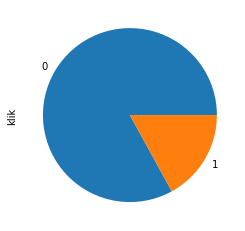

In [5]:
df.klik.value_counts(dropna = False, normalize=True).plot(kind='pie')

### Cyfryzuje słownikowo: 'date i godzinę'

In [6]:
df['data_godzina'].value_counts().shape

(84,)

In [7]:
df['data_godzina'].value_counts()

17030209    44832
17030210    43726
17030212    40676
17030211    38932
17030213    32517
            ...  
17030122     8854
17030400     8083
17030411     8064
17030200     7755
17030123     7398
Name: data_godzina, Length: 84, dtype: int64

<span style="color:blue">df['data_godzina'] będzie traktowana jak zmienna dyskretna. To nie jest żadna data i godzina, z której można wyciągnąć dzień tygodnia</span>

Cyfryzuje przez mapowanie słownikowe

In [8]:
df['C_data_godzina'] = pd.Categorical(df['data_godzina']).codes
df[['data_godzina','C_data_godzina']].sample(2)

,data_godzina,C_data_godzina
1161773,17030312,60
61974,17030103,3


In [9]:
SL_data_godzina = df.set_index('data_godzina')['C_data_godzina'].to_dict()
print(SL_data_godzina)
df['CYF_data_godzina'] = df['data_godzina'].map(SL_data_godzina)
del df['C_data_godzina']
df[['CYF_data_godzina','data_godzina']].sample(4)

{17030100: 0, 17030101: 1, 17030102: 2, 17030103: 3, 17030104: 4, 17030105: 5, 17030106: 6, 17030107: 7, 17030108: 8, 17030109: 9, 17030110: 10, 17030111: 11, 17030112: 12, 17030113: 13, 17030114: 14, 17030115: 15, 17030116: 16, 17030117: 17, 17030118: 18, 17030119: 19, 17030120: 20, 17030121: 21, 17030122: 22, 17030123: 23, 17030200: 24, 17030201: 25, 17030202: 26, 17030203: 27, 17030204: 28, 17030205: 29, 17030206: 30, 17030207: 31, 17030208: 32, 17030209: 33, 17030210: 34, 17030211: 35, 17030212: 36, 17030213: 37, 17030214: 38, 17030215: 39, 17030216: 40, 17030217: 41, 17030218: 42, 17030219: 43, 17030220: 44, 17030221: 45, 17030222: 46, 17030223: 47, 17030300: 48, 17030301: 49, 17030302: 50, 17030303: 51, 17030304: 52, 17030305: 53, 17030306: 54, 17030307: 55, 17030308: 56, 17030309: 57, 17030310: 58, 17030311: 59, 17030312: 60, 17030313: 61, 17030314: 62, 17030315: 63, 17030316: 64, 17030317: 65, 17030318: 66, 17030319: 67, 17030320: 68, 17030321: 69, 17030322: 70, 17030323: 71, 1

,CYF_data_godzina,data_godzina
1278935,67,17030319
945722,47,17030223
323972,16,17030116
131010,6,17030106


In [10]:
## Sprawdzenie:
print(df['data_godzina'].value_counts().shape)
print(df['CYF_data_godzina'].value_counts().shape)
print(SL_data_godzina)

(84,)
(84,)
{17030100: 0, 17030101: 1, 17030102: 2, 17030103: 3, 17030104: 4, 17030105: 5, 17030106: 6, 17030107: 7, 17030108: 8, 17030109: 9, 17030110: 10, 17030111: 11, 17030112: 12, 17030113: 13, 17030114: 14, 17030115: 15, 17030116: 16, 17030117: 17, 17030118: 18, 17030119: 19, 17030120: 20, 17030121: 21, 17030122: 22, 17030123: 23, 17030200: 24, 17030201: 25, 17030202: 26, 17030203: 27, 17030204: 28, 17030205: 29, 17030206: 30, 17030207: 31, 17030208: 32, 17030209: 33, 17030210: 34, 17030211: 35, 17030212: 36, 17030213: 37, 17030214: 38, 17030215: 39, 17030216: 40, 17030217: 41, 17030218: 42, 17030219: 43, 17030220: 44, 17030221: 45, 17030222: 46, 17030223: 47, 17030300: 48, 17030301: 49, 17030302: 50, 17030303: 51, 17030304: 52, 17030305: 53, 17030306: 54, 17030307: 55, 17030308: 56, 17030309: 57, 17030310: 58, 17030311: 59, 17030312: 60, 17030313: 61, 17030314: 62, 17030315: 63, 17030316: 64, 17030317: 65, 17030318: 66, 17030319: 67, 17030320: 68, 17030321: 69, 17030322: 70, 170

### Cyfryzuje słownikowo: 'baner_pozycja'
NIE TRZEBA CYFRYZOWAĆ

In [11]:
print(df['baner_pozycja'].value_counts().shape)
df['baner_pozycja'].value_counts()
df['CYF_baner_pozycja']=df['baner_pozycja']

(7,)


In [12]:
df.dtypes

id                      int64
klik                    int64
data_godzina            int64
baner_pozycja           int64
strona_id              object
strona_domena          object
strona_kategoria       object
aplikacja_id           object
aplikacja_domena       object
aplikacja_kategoria    object
urz_id                 object
urz_ip                 object
urz_model              object
urz_typ                 int64
urz_polaczenie          int64
kat1                    int64
kat2                    int64
kat3                    int64
kat4                    int64
kat5                    int64
kat6                    int64
kat7                    int64
kat8                    int64
kat9                    int64
CYF_data_godzina        int64
CYF_baner_pozycja       int64
dtype: object

### Cyfryzuje słownikowo:  'strona_id'

In [13]:
print(df['strona_id'].value_counts().shape)
df['strona_id'].value_counts()

(2674,)


85f751fd    541171
1fbe01fe    250953
e151e245     83318
d9750ee7     41939
5b08c53b     29705
             ...  
3a2f0507         1
37a7f08e         1
28f6e24a         1
569cb34d         1
d00d4bf2         1
Name: strona_id, Length: 2674, dtype: int64

In [14]:
## Cyfryzuje przez mapowanie słownikowe:
df['C_strona_id'] = pd.Categorical(df['strona_id']).codes
df[['strona_id','C_strona_id']].sample(2)

,strona_id,C_strona_id
97325,85f751fd,1413
629154,7443a906,1239


In [15]:
SL_strona_id = df.set_index('strona_id')['C_strona_id'].to_dict()
#print(SL_strona_id)
df['CYF_strona_id'] = df['strona_id'].map(SL_strona_id)
del df['C_strona_id']
df[['CYF_strona_id','strona_id']].sample(4)

,CYF_strona_id,strona_id
1116201,981,57fe1b20
1103708,2257,d8bb8687
403307,323,1fbe01fe
1101012,1010,5bcf81a2


In [16]:
## Sprawdzenie:
print(df['strona_id'].value_counts().shape)
print(df['CYF_strona_id'].value_counts().shape)
#print(SL_strona_id)

(2674,)
(2674,)


### <span style="color:blue">Cyfryzuje słownikowo: 'strona_domena'</span>

In [17]:
print(df['strona_domena'].value_counts().shape)
df['strona_domena'].value_counts()

(2934,)


c4e18dd6    559885
f3845767    250953
7e091613    102009
98572c79     44416
7687a86e     40878
             ...  
df7227d9         1
6505b941         1
95c6a19c         1
377e4789         1
43d9c8f2         1
Name: strona_domena, Length: 2934, dtype: int64

In [18]:
## Cyfryzuje przez mapowanie słownikowe:
df['C_strona_domena'] = pd.Categorical(df['strona_domena']).codes
df[['strona_domena','C_strona_domena']].sample(2)

,strona_domena,C_strona_domena
1474584,f3845767,2785
101182,c4e18dd6,2255


In [19]:
SL_strona_domena = df.set_index('strona_domena')['C_strona_domena'].to_dict()
#print(SL_strona_domena)
df['CYF_strona_domena'] = df['strona_domena'].map(SL_strona_domena)
del df['C_strona_domena']
df[['CYF_strona_domena','strona_domena']].sample(4)

,CYF_strona_domena,strona_domena
100497,2255,c4e18dd6
1017330,2785,f3845767
422109,2255,c4e18dd6
809416,1746,98572c79


In [20]:
## Sprawdzenie:
print(df['strona_domena'].value_counts().shape)
print(df['CYF_strona_domena'].value_counts().shape)
#print(SL_strona_domena)

(2934,)
(2934,)


### <span style="color:blue">Cyfryzuje słownikowo: 'strona_kategoria'</span>

In [21]:
print(df['strona_kategoria'].value_counts().shape)
df['strona_kategoria'].value_counts()

(21,)


50e219e0    600000
f028772b    458162
28905ebd    293606
3e814130    113611
f66779e6     13701
335d28a8      5816
76b2941d      4928
75fa27f6      4614
72722551      1569
c0dd3be3      1066
0569f928      1020
70fb0e29       926
dedf689d       582
a818d37a       180
42a36e14        70
e787de0e        65
bcf865d9        47
5378d028        17
8fd0aea4        13
74073276         4
9ccfa2ea         3
Name: strona_kategoria, dtype: int64

In [22]:
## Cyfryzuje przez mapowanie słownikowe:
df['C_strona_kategoria'] = pd.Categorical(df['strona_kategoria']).codes
df[['strona_kategoria','C_strona_kategoria']].sample(2)

,strona_kategoria,C_strona_kategoria
493262,f028772b,19
164172,28905ebd,1


In [23]:
SL_strona_kategoria = df.set_index('strona_kategoria')['C_strona_kategoria'].to_dict()
print(SL_strona_kategoria)
df['CYF_strona_kategoria'] = df['strona_kategoria'].map(SL_strona_kategoria)
del df['C_strona_kategoria']
df[['CYF_strona_kategoria','strona_kategoria']].sample(4)

{'50e219e0': 5, '28905ebd': 1, '3e814130': 3, 'f028772b': 19, '72722551': 8, '76b2941d': 11, 'f66779e6': 20, '335d28a8': 2, '0569f928': 0, '75fa27f6': 10, 'c0dd3be3': 16, 'a818d37a': 14, '42a36e14': 4, '70fb0e29': 7, 'bcf865d9': 15, '8fd0aea4': 12, '5378d028': 6, 'e787de0e': 18, 'dedf689d': 17, '74073276': 9, '9ccfa2ea': 13}


,CYF_strona_kategoria,strona_kategoria
1074788,19,f028772b
937422,1,28905ebd
1336368,5,50e219e0
996495,19,f028772b


In [24]:
## Sprawdzenie:
print(df['strona_kategoria'].value_counts().shape)
print(df['CYF_strona_kategoria'].value_counts().shape)
print(SL_strona_kategoria)

(21,)
(21,)
{'50e219e0': 5, '28905ebd': 1, '3e814130': 3, 'f028772b': 19, '72722551': 8, '76b2941d': 11, 'f66779e6': 20, '335d28a8': 2, '0569f928': 0, '75fa27f6': 10, 'c0dd3be3': 16, 'a818d37a': 14, '42a36e14': 4, '70fb0e29': 7, 'bcf865d9': 15, '8fd0aea4': 12, '5378d028': 6, 'e787de0e': 18, 'dedf689d': 17, '74073276': 9, '9ccfa2ea': 13}


### <span style="color:blue">Cyfryzuje słownikowo: 'aplikacja_id'</span>

In [25]:
print(df[ 'aplikacja_id'].value_counts().shape)
df[ 'aplikacja_id'].value_counts()

(3443,)


ecad2386    958829
7358e05e     42375
e2fcccd2     39904
febd1138     28105
a5184c22     22450
             ...  
a93114fb         1
58d1f275         1
f35641ed         1
63d0fd0a         1
df615936         1
Name: aplikacja_id, Length: 3443, dtype: int64

In [26]:
## Cyfryzuje przez mapowanie słownikowe:
df['C_aplikacja_id'] = pd.Categorical(df['aplikacja_id']).codes
df[['aplikacja_id','C_aplikacja_id']].sample(2)

,aplikacja_id,C_aplikacja_id
380169,617593f1,1354
1375869,ecad2386,3165


In [27]:
SL_aplikacja_id = df.set_index('aplikacja_id')['C_aplikacja_id'].to_dict()
#print(SL_aplikacja_id)
df['CYF_aplikacja_id'] = df['aplikacja_id'].map(SL_aplikacja_id)
del df['C_aplikacja_id']
df[['CYF_aplikacja_id','aplikacja_id']].sample(4)

,CYF_aplikacja_id,aplikacja_id
75784,43,03528b27
810926,3165,ecad2386
819764,3165,ecad2386
188920,3115,e9739828


In [28]:
## Sprawdzenie:
print(df['aplikacja_id'].value_counts().shape)
print(df['CYF_aplikacja_id'].value_counts().shape)
#print(SL_aplikacja_id)

(3443,)
(3443,)


### <span style="color:blue"> Cyfryzuje słownikowo: 'aplikacja_domena'</span>

In [29]:
print(df['aplikacja_domena'].value_counts().shape)
df['aplikacja_domena'].value_counts()

(215,)


7801e8d9    1009180
2347f47a     191727
b9528b13      43281
5c5a694b      39909
d9b5648e      31102
             ...   
95f77e10          1
b50610ee          1
6b062297          1
bb2a164d          1
800100e0          1
Name: aplikacja_domena, Length: 215, dtype: int64

In [30]:
## Cyfryzuje przez mapowanie słownikowe:
df['C_aplikacja_domena'] = pd.Categorical(df['aplikacja_domena']).codes
df[['aplikacja_domena','C_aplikacja_domena']].sample(2)

,aplikacja_domena,C_aplikacja_domena
744756,7801e8d9,92
881670,7801e8d9,92


In [31]:
SL_aplikacja_domena = df.set_index('aplikacja_domena')['C_aplikacja_domena'].to_dict()
print(SL_aplikacja_domena)
df['CYF_aplikacja_domena'] = df['aplikacja_domena'].map(SL_aplikacja_domena)
del df['C_aplikacja_domena']
df[['CYF_aplikacja_domena','aplikacja_domena']].sample(4)

{'82e27996': 101, '7801e8d9': 92, '2347f47a': 31, '828da833': 100, '45a51db4': 54, '33da2e74': 42, 'd9b5648e': 181, 'df32afa9': 188, 'aefc06bd': 139, '813f3323': 99, '885c7f3f': 105, '5c5a694b': 72, 'ae637522': 137, '0654b444': 2, '5b9c592b': 70, 'b8d325c3': 153, 'f2f777fb': 203, 'c6824def': 169, '5c620f04': 73, '3feeed1e': 48, '56eabb45': 64, 'ad63ec9b': 134, 'b9528b13': 156, 'b5f3b24a': 149, 'b2816726': 143, '6f7ca2ba': 85, 'e787a6bc': 194, '15ec7f39': 13, 'f3ad7798': 204, '5ac0b939': 67, '43cf4f06': 50, '2b627705': 39, 'e5d5313f': 193, 'a271c340': 128, '18eb4e75': 16, '15c23f8e': 12, '47464e95': 55, '8d87821d': 109, 'db829551': 185, '9ecca2dd': 126, '700adbf0': 86, '0e8616ad': 8, '9acfe436': 120, 'fd68cbd8': 214, '88293ffa': 104, 'b408d42a': 146, '999f1fac': 118, '7bbb38df': 96, '1ed56ded': 26, 'b6c7e8e1': 150, '0eb1a401': 9, '0d79ee56': 7, 'fd5f0ee2': 213, 'd6feb1a4': 179, 'b51aefa8': 148, '27ee373d': 36, 'cb36afb8': 173, '9ec164d3': 125, 'b12ff13e': 142, 'ef1fc174': 201, '2619a4f7

,CYF_aplikacja_domena,aplikacja_domena
1470448,31,2347f47a
510139,92,7801e8d9
727487,92,7801e8d9
837479,92,7801e8d9


In [32]:
## Sprawdzenie:
print(df['aplikacja_domena'].value_counts().shape)
print(df['CYF_aplikacja_domena'].value_counts().shape)
print(SL_aplikacja_domena)

(215,)
(215,)
{'82e27996': 101, '7801e8d9': 92, '2347f47a': 31, '828da833': 100, '45a51db4': 54, '33da2e74': 42, 'd9b5648e': 181, 'df32afa9': 188, 'aefc06bd': 139, '813f3323': 99, '885c7f3f': 105, '5c5a694b': 72, 'ae637522': 137, '0654b444': 2, '5b9c592b': 70, 'b8d325c3': 153, 'f2f777fb': 203, 'c6824def': 169, '5c620f04': 73, '3feeed1e': 48, '56eabb45': 64, 'ad63ec9b': 134, 'b9528b13': 156, 'b5f3b24a': 149, 'b2816726': 143, '6f7ca2ba': 85, 'e787a6bc': 194, '15ec7f39': 13, 'f3ad7798': 204, '5ac0b939': 67, '43cf4f06': 50, '2b627705': 39, 'e5d5313f': 193, 'a271c340': 128, '18eb4e75': 16, '15c23f8e': 12, '47464e95': 55, '8d87821d': 109, 'db829551': 185, '9ecca2dd': 126, '700adbf0': 86, '0e8616ad': 8, '9acfe436': 120, 'fd68cbd8': 214, '88293ffa': 104, 'b408d42a': 146, '999f1fac': 118, '7bbb38df': 96, '1ed56ded': 26, 'b6c7e8e1': 150, '0eb1a401': 9, '0d79ee56': 7, 'fd5f0ee2': 213, 'd6feb1a4': 179, 'b51aefa8': 148, '27ee373d': 36, 'cb36afb8': 173, '9ec164d3': 125, 'b12ff13e': 142, 'ef1fc174': 

### <span style="color:blue"> Cyfryzuje słownikowo:  'aplikacja_kategoria'</span>

In [33]:
print(df['aplikacja_kategoria'].value_counts().shape)
df['aplikacja_kategoria'].value_counts()

(26,)


07d7df22    971720
0f2161f8    347532
cef3e649     91017
f95efa07     36557
8ded1f7a     34818
d1327cf5      5900
09481d60      4858
dc97ec06      1883
75d80bbe      1815
4ce2e9fc       929
879c24eb       865
fc6fa53d       819
a3c42688       398
4681bb9d       280
0f9a328c       258
a86a3e89       106
2281a340        80
8df2e842        62
0bfbc358        36
79f0b860        23
a7fd01ec        20
7113d72a         9
18b1e0be         8
2fc4f2aa         3
5326cf99         3
71af18ce         1
Name: aplikacja_kategoria, dtype: int64

In [34]:
## Cyfryzuje przez mapowanie słownikowe:
df['C_aplikacja_kategoria'] = pd.Categorical(df['aplikacja_kategoria']).codes
df[['aplikacja_kategoria','C_aplikacja_kategoria']].sample(2)

,aplikacja_kategoria,C_aplikacja_kategoria
1398649,07d7df22,0
385522,07d7df22,0


In [35]:
SL_aplikacja_kategoria = df.set_index('aplikacja_kategoria')['C_aplikacja_kategoria'].to_dict()
print(SL_aplikacja_kategoria)
df['CYF_aplikacja_kategoria'] = df['aplikacja_kategoria'].map(SL_aplikacja_kategoria)
del df['C_aplikacja_kategoria']
df[['CYF_aplikacja_kategoria','aplikacja_kategoria']].sample(4)

{'0f2161f8': 3, '07d7df22': 0, 'cef3e649': 21, 'f95efa07': 24, 'd1327cf5': 22, '8ded1f7a': 16, '4ce2e9fc': 9, '75d80bbe': 13, 'a3c42688': 18, '09481d60': 1, 'dc97ec06': 23, '0f9a328c': 4, '879c24eb': 15, 'fc6fa53d': 25, 'a7fd01ec': 19, 'a86a3e89': 20, '7113d72a': 11, '4681bb9d': 8, '0bfbc358': 2, '2281a340': 6, '79f0b860': 14, '8df2e842': 17, '18b1e0be': 5, '2fc4f2aa': 7, '5326cf99': 10, '71af18ce': 12}


,CYF_aplikacja_kategoria,aplikacja_kategoria
1248172,0,07d7df22
1238732,0,07d7df22
68402,16,8ded1f7a
633090,3,0f2161f8


In [36]:
## Sprawdzenie:
print(df['aplikacja_kategoria'].value_counts().shape)
print(df['CYF_aplikacja_kategoria'].value_counts().shape)
print(SL_aplikacja_kategoria)

(26,)
(26,)
{'0f2161f8': 3, '07d7df22': 0, 'cef3e649': 21, 'f95efa07': 24, 'd1327cf5': 22, '8ded1f7a': 16, '4ce2e9fc': 9, '75d80bbe': 13, 'a3c42688': 18, '09481d60': 1, 'dc97ec06': 23, '0f9a328c': 4, '879c24eb': 15, 'fc6fa53d': 25, 'a7fd01ec': 19, 'a86a3e89': 20, '7113d72a': 11, '4681bb9d': 8, '0bfbc358': 2, '2281a340': 6, '79f0b860': 14, '8df2e842': 17, '18b1e0be': 5, '2fc4f2aa': 7, '5326cf99': 10, '71af18ce': 12}


### <span style="color:blue"> 'urz_id'</span>

In [37]:
print(df['urz_id'].value_counts().shape)
df['urz_id'].value_counts()

(199796,)


a99f214a    1234185
c357dbff       1856
936e92fb        699
cef4c8cc        192
afeffc18        191
             ...   
13b702c5          1
409f5841          1
6c3d916b          1
b9ac65ca          1
cd94c24e          1
Name: urz_id, Length: 199796, dtype: int64

In [38]:
## Cyfryzuje przez mapowanie słownikowe:
df['C_urz_id'] = pd.Categorical(df['urz_id']).codes
df[['urz_id','C_urz_id']].sample(2)

,urz_id,C_urz_id
904298,a99f214a,132302
67648,a99f214a,132302


In [39]:
SL_urz_id = df.set_index('urz_id')['C_urz_id'].to_dict()
#print(SL_urz_id)
df['CYF_urz_id'] = df['urz_id'].map(SL_urz_id)
del df['C_urz_id']
df[['CYF_urz_id','urz_id']].sample(4)

,CYF_urz_id,urz_id
976517,132302,a99f214a
388152,132302,a99f214a
1214973,132302,a99f214a
1314337,132302,a99f214a


In [40]:
## Sprawdzenie:
print(df['urz_id'].value_counts().shape)
print(df['CYF_urz_id'].value_counts().shape)
#print(SL_urz_id)

(199796,)
(199796,)


### <span style="color:blue"> Cyfryzuje słownikowo: Cyfryzuje słownikowo: 'urz_ip'</span>

In [41]:
print(df['urz_ip'].value_counts().shape)
df['urz_ip'].value_counts()

(679058,)


6b9769f2    7610
431b3174    5054
ddd2926e    2722
1cf29716    2706
c6563308    2700
            ... 
9252f209       1
df598600       1
53ff1472       1
e0ca0cb2       1
5c2af245       1
Name: urz_ip, Length: 679058, dtype: int64

In [42]:
## Cyfryzuje przez mapowanie słownikowe:
df['C_urz_ip'] = pd.Categorical(df['urz_ip']).codes
df[['urz_ip','C_urz_ip']].sample(2)

,urz_ip,C_urz_ip
979814,b26d50a4,473517
1016451,b58a2d6c,481619


In [43]:
SL_urz_ip = df.set_index('urz_ip')['C_urz_ip'].to_dict()
#print(SL_urz_ip)
df['CYF_urz_ip'] = df['urz_ip'].map(SL_urz_ip)
del df['C_urz_ip']
df[['CYF_urz_ip','urz_ip']].sample(4)

,CYF_urz_ip,urz_ip
750796,588229,dda109b9
1497045,240234,5a973169
1076970,152127,39686db2
972905,279653,6964a96f


In [44]:
## Sprawdzenie:
print(df['urz_ip'].value_counts().shape)
print(df['CYF_urz_ip'].value_counts().shape)
#print(SL_urz_ip)

(679058,)
(679058,)


### <span style="color:blue">'urz_model'</span>

In [45]:
print(df['urz_model'].value_counts().shape)
df['urz_model'].value_counts()

(5435,)


8a4875bd    95638
1f0bc64f    55339
d787e91b    50570
76dc4769    27301
4ea23a13    26297
            ...  
00c0a3a2        1
29093f50        1
eb7d45a5        1
5aa3e1c7        1
3c34c1ad        1
Name: urz_model, Length: 5435, dtype: int64

In [46]:
## Cyfryzuje przez mapowanie słownikowe:
df['C_urz_model'] = pd.Categorical(df['urz_model']).codes
df[['urz_model','C_urz_model']].sample(2)

,urz_model,C_urz_model
430987,1b13b020,561
1114375,4c8aeb60,1628


In [47]:
SL_urz_model = df.set_index('urz_model')['C_urz_model'].to_dict()
#print(SL_urz_model)
df['CYF_urz_model'] = df['urz_model'].map(SL_urz_model)
del df['C_urz_model']
df[['CYF_urz_model','urz_model']].sample(4)

,CYF_urz_model,urz_model
888341,3080,90f22c00
309024,3247,99e427c9
304680,5032,ecb851b2
1165918,3421,a0f5f879


In [48]:
## Sprawdzenie:
print(df['urz_model'].value_counts().shape)
print(df['CYF_urz_model'].value_counts().shape)
#print(SL_urz_model)

(5435,)
(5435,)


In [49]:
df.columns

Index(['id', 'klik', 'data_godzina', 'baner_pozycja', 'strona_id',
       'strona_domena', 'strona_kategoria', 'aplikacja_id', 'aplikacja_domena',
       'aplikacja_kategoria', 'urz_id', 'urz_ip', 'urz_model', 'urz_typ',
       'urz_polaczenie', 'kat1', 'kat2', 'kat3', 'kat4', 'kat5', 'kat6',
       'kat7', 'kat8', 'kat9', 'CYF_data_godzina', 'CYF_baner_pozycja',
       'CYF_strona_id', 'CYF_strona_domena', 'CYF_strona_kategoria',
       'CYF_aplikacja_id', 'CYF_aplikacja_domena', 'CYF_aplikacja_kategoria',
       'CYF_urz_id', 'CYF_urz_ip', 'CYF_urz_model'],
      dtype='object')

### <span style="color:blue"> Cyfryzuje słownikowo: 'urz_typ'</span>
NIE TRZEBA CYFRYZOWAĆ

In [50]:
print(df['urz_typ'].value_counts().shape)
df['urz_typ'].value_counts()

(4,)


1    1400544
0      70104
4      25556
5       3796
Name: urz_typ, dtype: int64

In [51]:
df['CYF_urz_typ']=df['urz_typ']

### <span style="color:blue"> Cyfryzuje słownikowo: 'urz_polaczenie'</span>
NIE TRZEBA CYFRYZOWAĆ

In [52]:
print(df['urz_polaczenie'].value_counts().shape)
df['urz_polaczenie'].value_counts()

(4,)


0    1329798
2     128312
3      40118
5       1772
Name: urz_polaczenie, dtype: int64

In [53]:
df['CYF_urz_polaczenie']=df['urz_polaczenie']

### <span style="color:blue"> Cyfryzuje słownikowo: kat1</span>

In [54]:
print(df['kat1'].value_counts().shape)
df['kat1'].value_counts()

(7,)


105    1395813
102      70104
110      29352
112       2219
107       1638
108        475
101        399
Name: kat1, dtype: int64

In [55]:
## Cyfryzuje przez mapowanie słownikowe:
df['C_kat1'] = pd.Categorical(df['kat1']).codes
df[['kat1','C_kat1']].sample(2)

,kat1,C_kat1
1171071,105,2
457439,105,2


In [56]:
SL_kat1 = df.set_index('kat1')['C_kat1'].to_dict()
#print(SL_kat1)
df['CYF_kat1'] = df['kat1'].map(SL_kat1)
del df['C_kat1']
df[['CYF_kat1','kat1']].sample(4)

,CYF_kat1,kat1
430051,2,105
697477,2,105
345218,2,105
541236,2,105


In [57]:
## Sprawdzenie:
print(df['kat1'].value_counts().shape)
print(df['CYF_kat1'].value_counts().shape)
#print(SL_kat1)

(7,)
(7,)


### <span style="color:blue"> Cyfryzuje słownikowo: kat2</span>

In [58]:
print(df['kat2'].value_counts().shape)
df['kat2'].value_counts()

(1154,)


121767    37576
121768    37497
121611    37065
119251    34228
104687    30844
          ...  
112229        1
121188        1
122201        1
122077        1
112203        1
Name: kat2, Length: 1154, dtype: int64

In [59]:
## Cyfryzuje przez mapowanie słownikowe:
df['C_kat2'] = pd.Categorical(df['kat2']).codes
df[['kat2','C_kat2']].sample(2)

,kat2,C_kat2
1068825,106563,47
1354570,122116,1027


In [60]:
SL_kat2 = df.set_index('kat2')['C_kat2'].to_dict()
#print(SL_kat2)
df['CYF_kat2'] = df['kat2'].map(SL_kat2)
del df['C_kat2']
df[['CYF_kat2','kat2']].sample(4)

,CYF_kat2,kat2
551763,784,121730
506079,836,121790
225818,517,120387
1096998,1042,122141


In [61]:
## Sprawdzenie:
print(df['kat2'].value_counts().shape)
print(df['CYF_kat2'].value_counts().shape)
#print(SL_kat2)

(1154,)
(1154,)


### <span style="color:blue"> Cyfryzuje słownikowo: kat3</span>

In [62]:
print(df['kat3'].value_counts().shape)
df['kat3'].value_counts()

(8,)


10320    1399940
10300      72116
10216      25027
10728       2719
10480        119
10768         31
11024         28
10120         20
Name: kat3, dtype: int64

In [63]:
## Cyfryzuje przez mapowanie słownikowe:
df['C_kat3'] = pd.Categorical(df['kat3']).codes
df[['kat3','C_kat3']].sample(2)

,kat3,C_kat3
909598,10320,3
1051027,10320,3


In [64]:
SL_kat3 = df.set_index('kat3')['C_kat3'].to_dict()
#print(SL_kat1)
df['CYF_kat3'] = df['kat3'].map(SL_kat3)
del df['C_kat3']
df[['CYF_kat3','kat3']].sample(4)

,CYF_kat3,kat3
670839,3,10320
181861,3,10320
1134294,3,10320
1140623,3,10320


In [65]:
## Sprawdzenie:
print(df['kat3'].value_counts().shape)
print(df['CYF_kat3'].value_counts().shape)
#print(SL_kat3)

(8,)
(8,)


### <span style="color:blue"> Cyfryzuje słownikowo: kat4</span>

In [66]:
print(df['kat4'].value_counts().shape)
df['kat4'].value_counts()

(9,)


10050    1407620
10250      60036
10036      25027
10480       4400
10090       2719
10320        119
11024         31
10768         28
10020         20
Name: kat4, dtype: int64

In [67]:
## Cyfryzuje przez mapowanie słownikowe:
df['C_kat4'] = pd.Categorical(df['kat4']).codes
df[['kat4','C_kat4']].sample(2)

,kat4,C_kat4
834817,10050,2
173207,10050,2


In [68]:
SL_kat4 = df.set_index('kat4')['C_kat4'].to_dict()
#print(SL_kat4)
df['CYF_kat4'] = df['kat4'].map(SL_kat4)
del df['C_kat4']
df[['CYF_kat4','kat4']].sample(4)

,CYF_kat4,kat4
202268,2,10050
278001,2,10050
1385420,2,10050
43991,2,10050


In [69]:
## Sprawdzenie:
print(df['kat4'].value_counts().shape)
print(df['CYF_kat4'].value_counts().shape)
#print(SL_kat4)

(9,)
(9,)


### <span style="color:blue"> Cyfryzuje słownikowo: kat5</span>

In [70]:
print(df['kat5'].value_counts().shape)
df['kat5'].value_counts()

(255,)


11722    185074
12502     85824
12506     80412
12333     51355
12507     44929
          ...  
12346         3
12375         3
12573         2
12541         1
11042         1
Name: kat5, Length: 255, dtype: int64

In [71]:
## Cyfryzuje przez mapowanie słownikowe:
df['C_kat5'] = pd.Categorical(df['kat5']).codes
df[['kat5','C_kat5']].sample(2)

,kat5,C_kat5
975805,11722,48
1230465,11722,48


In [72]:
SL_kat5 = df.set_index('kat5')['C_kat5'].to_dict()
#print(SL_kat5)
df['CYF_kat5'] = df['kat5'].map(SL_kat5)
del df['C_kat5']
df[['CYF_kat5','kat5']].sample(4)

,CYF_kat5,kat5
90035,99,12201
1356242,48,11722
758120,48,11722
1186942,133,12333


In [73]:
## Sprawdzenie:
print(df['kat5'].value_counts().shape)
print(df['CYF_kat5'].value_counts().shape)
#print(SL_kat5)

(255,)
(255,)


### <span style="color:blue"> Cyfryzuje słownikowo: kat6</span>

In [74]:
print(df['kat6'].value_counts().shape)
df['kat6'].value_counts()

(4,)


10    719535
13    500697
12    233205
11     46563
Name: kat6, dtype: int64

In [75]:
## Cyfryzuje przez mapowanie słownikowe:
df['C_kat6'] = pd.Categorical(df['kat6']).codes
df[['kat6','C_kat6']].sample(2)

,kat6,C_kat6
211486,13,3
139608,13,3


In [76]:
SL_kat6 = df.set_index('kat6')['C_kat6'].to_dict()
print(SL_kat6)
df['CYF_kat6'] = df['kat6'].map(SL_kat6)
del df['C_kat6']
df[['CYF_kat6','kat6']].sample(4)

{13: 3, 10: 0, 12: 2, 11: 1}


,CYF_kat6,kat6
1219706,2,12
526589,3,13
1487669,0,10
717985,0,10


In [77]:
## Sprawdzenie:
print(df['kat6'].value_counts().shape)
print(df['CYF_kat6'].value_counts().shape)
print(SL_kat6)

(4,)
(4,)
{13: 3, 10: 0, 12: 2, 11: 1}


### <span style="color:blue"> Cyfryzuje słownikowo: kat7</span>

In [78]:
print(df['kat7'].value_counts().shape)
df['kat7'].value_counts()

(53,)


10035    614228
10039    313082
10167     86839
11327     43893
10047     35977
10297     34234
10679     34150
10687     28886
10547     24325
10169     23889
10161     23404
10431     22473
11063     21152
11319     20073
10163     18192
10303     16791
10171     15352
10041     14383
11451     12520
10175     12143
10809      9905
10034      8508
10427      7670
10675      7461
10043      6834
10299      6796
10811      5435
11059      5213
11711      4351
10291      3653
10551      2851
10813      2484
10423      2074
11835      1844
10681      1370
10033      1065
11315       955
10801       777
10937       773
10553       760
10417       678
10943       650
10673       621
10425       569
10559       218
10045       188
11071       112
10555        82
10683        66
10295        18
10545        16
11447        15
10419         2
Name: kat7, dtype: int64

In [79]:
## Cyfryzuje przez mapowanie słownikowe:
df['C_kat7'] = pd.Categorical(df['kat7']).codes
df[['kat7','C_kat7']].sample(2)

,kat7,C_kat7
387828,10291,14
646604,10163,9


In [80]:
SL_kat7 = df.set_index('kat7')['C_kat7'].to_dict()
print(SL_kat7)
df['CYF_kat7'] = df['kat7'].map(SL_kat7)
del df['C_kat7']
df[['CYF_kat7','kat7']].sample(4)

{10427: 23, 10035: 2, 10039: 3, 10687: 36, 10551: 27, 11711: 51, 11835: 52, 10303: 18, 10163: 9, 10297: 16, 10047: 7, 10167: 10, 10801: 37, 10171: 12, 11063: 44, 10175: 13, 10813: 40, 10431: 24, 10041: 4, 11451: 50, 10043: 5, 10291: 14, 11319: 47, 10673: 31, 10681: 34, 11315: 46, 10161: 8, 10683: 35, 10169: 11, 10679: 33, 10943: 42, 11071: 45, 10559: 30, 11327: 48, 10547: 26, 10423: 21, 10425: 22, 10299: 17, 10033: 0, 10034: 1, 10295: 15, 10553: 28, 11447: 49, 10811: 39, 10555: 29, 10675: 32, 11059: 43, 10809: 38, 10937: 41, 10045: 6, 10417: 19, 10545: 25, 10419: 20}


,CYF_kat7,kat7
1072478,13,10175
1279634,2,10035
285884,2,10035
701646,2,10035


In [81]:
## Sprawdzenie:
print(df['kat7'].value_counts().shape)
print(df['CYF_kat7'].value_counts().shape)
#print(SL_kat7)

(53,)
(53,)


### <span style="color:blue"> Cyfryzuje słownikowo: kat8</span>

In [82]:
print(df['kat8'].value_counts().shape)
df['kat8'].value_counts()

(165,)


-1         751710
 100084     91087
 100111     69056
 100148     60905
 100077     54414
            ...  
 100100         1
 100157         1
 100246         1
 100186         1
 100209         1
Name: kat8, Length: 165, dtype: int64

In [83]:
## Cyfryzuje przez mapowanie słownikowe:
df['C_kat8'] = pd.Categorical(df['kat8']).codes
df[['kat8','C_kat8']].sample(2)

,kat8,C_kat8
173238,100060,43
49419,100084,62


In [84]:
SL_kat8 = df.set_index('kat8')['C_kat8'].to_dict()
#print(SL_kat8)
df['CYF_kat8'] = df['kat8'].map(SL_kat8)
del df['C_kat8']
df[['CYF_kat8','kat8']].sample(4)

,CYF_kat8,kat8
423146,0,-1
842066,59,100081
985473,83,100111
1231156,0,-1


In [85]:
## Sprawdzenie:
print(df['kat8'].value_counts().shape)
print(df['CYF_kat8'].value_counts().shape)
#print(SL_kat8)

(165,)
(165,)


### <span style="color:blue"> Cyfryzuje słownikowo: kat9</span>

In [86]:
print(df['kat9'].value_counts().shape)
df['kat9'].value_counts()

(45,)


23     228233
79     191767
221    184996
157    183166
61      83266
48      74914
32      74062
15      60896
33      44226
43      42879
117     37377
71      34348
68      30171
52      24476
51      24325
42      22842
13      21540
156     18613
46      15240
111     13981
91      12648
69      10548
90       9631
16       9195
17       8382
110      6838
112      6164
95       5272
35       4667
100      3102
101      2767
82       2197
194      1411
116      1222
20       1107
159      1026
163       678
93        643
94        434
195       360
70        218
102        82
85         59
219        29
178         2
Name: kat9, dtype: int64

In [87]:
## Cyfryzuje przez mapowanie słownikowe:
df['C_kat9'] = pd.Categorical(df['kat9']).codes
df[['kat9','C_kat9']].sample(2)

,kat9,C_kat9
1331350,23,5
147070,23,5


In [88]:
SL_kat9 = df.set_index('kat9')['C_kat9'].to_dict()
#print(SL_kat9)
df['CYF_kat9'] = df['kat9'].map(SL_kat9)
del df['C_kat9']
df[['CYF_kat9','kat9']].sample(4)

,CYF_kat9,kat9
235318,0,13
395354,5,23
616117,37,157
438138,44,221


In [89]:
## Sprawdzenie:
print(df['kat9'].value_counts().shape)
print(df['CYF_kat9'].value_counts().shape)
#print(SL_kat9)

(45,)
(45,)


<span style="color:blue">Wszystkie piowyższe zmienne dyskretne trzeba bðzie przerobić na cyfry. Problem polega na tym, że trzeba to zrobić przez słownik, ponieważ te przyporządkowanie musi pasowac do innego zbioru "Do zgłoszenia".
Ciekawe co zrobić, jak zmienne dyskretne nie będą te same w zbiorze uczącym i co zmienne  w zbiorze "do zgłoszenia"
</span>

In [90]:
df['klik'] = df.klik.astype('int64')
df.dtypes

id                          int64
klik                        int64
data_godzina                int64
baner_pozycja               int64
strona_id                  object
strona_domena              object
strona_kategoria           object
aplikacja_id               object
aplikacja_domena           object
aplikacja_kategoria        object
urz_id                     object
urz_ip                     object
urz_model                  object
urz_typ                     int64
urz_polaczenie              int64
kat1                        int64
kat2                        int64
kat3                        int64
kat4                        int64
kat5                        int64
kat6                        int64
kat7                        int64
kat8                        int64
kat9                        int64
CYF_data_godzina            int64
CYF_baner_pozycja           int64
CYF_strona_id               int64
CYF_strona_domena           int64
CYF_strona_kategoria        int64
CYF_aplikacja_

### <span style="color:blue">Wybór zmiennych do analizy</span>

In [91]:
df2 = df[['klik','CYF_data_godzina', 'CYF_baner_pozycja',
       'CYF_strona_id', 'CYF_strona_domena', 'CYF_strona_kategoria',
       'CYF_aplikacja_id', 'CYF_aplikacja_domena', 'CYF_aplikacja_kategoria',
       'CYF_urz_id', 'CYF_urz_ip', 'CYF_urz_model', 'CYF_urz_typ',
       'CYF_urz_polaczenie', 'CYF_kat1', 'CYF_kat2', 'CYF_kat3', 'CYF_kat4',
       'CYF_kat5', 'CYF_kat6', 'CYF_kat7', 'CYF_kat8', 'CYF_kat9']]

In [92]:
df.dtypes

id                          int64
klik                        int64
data_godzina                int64
baner_pozycja               int64
strona_id                  object
strona_domena              object
strona_kategoria           object
aplikacja_id               object
aplikacja_domena           object
aplikacja_kategoria        object
urz_id                     object
urz_ip                     object
urz_model                  object
urz_typ                     int64
urz_polaczenie              int64
kat1                        int64
kat2                        int64
kat3                        int64
kat4                        int64
kat5                        int64
kat6                        int64
kat7                        int64
kat8                        int64
kat9                        int64
CYF_data_godzina            int64
CYF_baner_pozycja           int64
CYF_strona_id               int64
CYF_strona_domena           int64
CYF_strona_kategoria        int64
CYF_aplikacja_

### <span style="color:blue">Podział na zbiór testowy i wynikowy</span>

In [93]:
y = df2['klik']
X = df2.drop('klik', axis=1)

In [94]:
from sklearn.model_selection import train_test_split 
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size=0.33, stratify = y, random_state = 148)

print ('Zbiór X treningowy: ',Xtrain.shape)
print ('Zbiór X testowy:    ', Xtest.shape)
print ('Zbiór y treningowy: ', ytrain.shape)
print ('Zbiór y testowy:    ', ytest.shape)

Zbiór X treningowy:  (1005000, 22)
Zbiór X testowy:     (495000, 22)
Zbiór y treningowy:  (1005000,)
Zbiór y testowy:     (495000,)


### <span style="color:blue">OVERSAMPLING</span>

In [95]:
print("ytrain = 0: ", sum(ytrain == 0))
print("ytrain = 1: ", sum(ytrain == 1))

ytrain = 0:  834052
ytrain = 1:  170948


In [96]:
Proporcja = sum(ytrain == 0) / sum(ytrain == 1) 
Proporcja = np.round(Proporcja, decimals=0)
Proporcja = Proporcja.astype(int)
print('Ilość -0 klik na -1 klik: ', Proporcja)

Ilość -0 klik na -1 klik:  5


In [97]:
ytrain_OV = pd.concat([ytrain[ytrain==1]] * Proporcja, axis = 0) 
ytrain_OV.count()

854740

Powiękrzyliśmy ilość zmiennych wynikowych 1. Teraz mamy tę samą liczbę wierszy zmiennych wynikowych i zmiennych niezależnych. Teraz wprowadzamy nowe, dodatkowe zmienne 1 do zbioru treningowego.

In [98]:
Xtrain_OV = pd.concat([Xtrain.loc[ytrain==1, :]] * Proporcja, axis = 0)
ytrain_OV.count()

854740

In [99]:
ytrain_OV = pd.concat([ytrain, ytrain_OV], axis = 0).reset_index(drop = True)
Xtrain_OV = pd.concat([Xtrain, Xtrain_OV], axis = 0).reset_index(drop = True)

print("ilość elementów w zbiorze Xtrain:     ", Xtrain.CYF_kat5.count())
print("ilość elementów w zbiorze Xtrain_OV:  ", Xtrain_OV.CYF_kat5.count())
print("ilość elementów w zbiorze ytrain:     ", ytrain.count())
print("ilość elementów w zbiorze ytrain_OV:  ", ytrain_OV.count())

ilość elementów w zbiorze Xtrain:      1005000
ilość elementów w zbiorze Xtrain_OV:   1859740
ilość elementów w zbiorze ytrain:      1005000
ilość elementów w zbiorze ytrain_OV:   1859740


Poziom zbilansowania zbioru wynikowego:

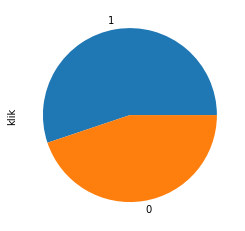

In [100]:
ytrain_OV.value_counts(dropna = False, normalize=True).plot(kind='pie')

### Standaryzacja

# <span style="color:blue"> Model regresji RandomForest</span>

In [101]:
from sklearn.ensemble import RandomForestClassifier

forestVC = RandomForestClassifier (random_state = 1, 
                                  n_estimators = 350, 
                                  max_depth = 2, 
                                  min_samples_split = 2, min_samples_leaf = 3) 
RFC_S = forestVC.fit(Xtrain_OV, ytrain_OV)
y_pred_RFC = RFC_S.predict(Xtest)

Recall Training data:      0.8784
Precision Training data:   0.5867
----------------------------------------------------------------------
Recall Test data:          0.8783
Precision Test data:       0.1912
----------------------------------------------------------------------
Confusion Matrix Test data
[[ 97944 312858]
 [ 10246  73952]]
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.24      0.38    410802
           1       0.19      0.88      0.31     84198

    accuracy                           0.35    495000
   macro avg       0.55      0.56      0.35    495000
weighted avg       0.78      0.35      0.37    495000



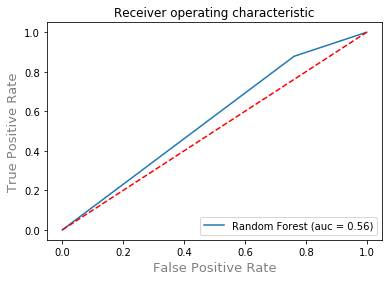

In [102]:
# ocena modelu
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix, log_loss, auc, roc_curve, roc_auc_score, recall_score, precision_recall_curve
from sklearn.metrics import make_scorer, precision_score, fbeta_score, f1_score, classification_report

print("Recall Training data:     ", np.round(recall_score(ytrain_OV, RFC_S.predict(Xtrain_OV)), decimals=4))
print("Precision Training data:  ", np.round(precision_score(ytrain_OV, RFC_S.predict(Xtrain_OV)), decimals=4))
print("----------------------------------------------------------------------")
print("Recall Test data:         ", np.round(recall_score(ytest, RFC_S.predict(Xtest)), decimals=4)) 
print("Precision Test data:      ", np.round(precision_score(ytest, RFC_S.predict(Xtest)), decimals=4))
print("----------------------------------------------------------------------")
print("Confusion Matrix Test data")
print(confusion_matrix(ytest, RFC_S.predict(Xtest)))
print("----------------------------------------------------------------------")
print(classification_report(ytest, RFC_S.predict(Xtest)))
y_pred_proba = RFC_S.predict_proba(Xtest)[::,1]
fpr, tpr, _ = metrics.roc_curve(ytest,  y_pred_RFC)
auc = metrics.roc_auc_score(ytest, y_pred_RFC)
plt.plot(fpr, tpr, label='Random Forest (auc = %0.2f)' % auc)
plt.xlabel('False Positive Rate',color='grey', fontsize = 13)
plt.ylabel('True Positive Rate',color='grey', fontsize = 13)
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.legend(loc=4)
plt.plot([0, 1], [0, 1],'r--')
plt.show()

auc =0.64

https://stackoverflow.com/questions/39163354/evaluating-logistic-regression-with-cross-validation

# <span style="color:blue"> Model SVM</span>

In [103]:
print('Pomiar czasu wykonania tego zadania')
print('Minut: ',(time.time() - start_time)/60) ## koniec pomiaru czasu

Pomiar czasu wykonania tego zadania
Minut:  11.130807137489318
